In [1]:
import tensorflow.keras as keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras import losses
from keras.callbacks import EarlyStopping
from keras import backend as K

Using TensorFlow backend.


In [2]:
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

samples= 5
tipo = 3    # np.random.randint(4)
index_image = np.random.randint(100000)  


# ========== EXTRACCIÓN DE DATOS ==============
archivo = open('/home/endredra/Desktop/Int_proj/EL4106-1oProyecto/dataset/HiTS2013_100k_samples(4_channels)_images_labels.pkl',"rb")
example_dict= pickle.load(archivo)
print('Dimension of labels: N=',example_dict['labels'].shape[0])
print('Dimension of images:',example_dict['images'].shape)

L=example_dict['labels'].shape[0] #numero total de imagenes

Dimension of labels: N= 100000
Dimension of images: (100000, 21, 21, 4)


In [5]:
percentage_train=0.75

percentage= int(percentage_train*L)
xx = example_dict['images'][:, :, :, tipo]
yy= example_dict['labels']
print('Dimension of images to train:',xx[:percentage].shape)
print('Dimension of images to test:',xx[percentage:].shape)
print('Number of images to train: ', yy[:percentage].shape[0])
print('Number of images to test: ',yy[percentage:].shape[0])

#database to train
x_train=xx[:percentage]
y_train=yy[:percentage]

#database to test
x_test=xx[percentage:]
y_test=yy[percentage:]

#input shape para las redes convolucionales
input_shape1=x_test.shape[1]
input_shape2=x_test.shape[2]
print('\n\ninput_shape: ' , input_shape1, 'x', input_shape2)

input_shape = (input_shape1, input_shape2, 1)

Dimension of images to train: (75000, 21, 21)
Dimension of images to test: (25000, 21, 21)
Number of images to train:  75000
Number of images to test:  25000


input_shape:  21 x 21


In [6]:
# Reshape the images.
r_x_train= np.expand_dims(x_train, axis=3)
r_x_test = np.expand_dims(x_test, axis=3)

In [7]:
############ modelo MLP #################

#model = tf.keras.models.Sequential()
 
#capas

#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))


############ modelo Conv test #################


#model = Sequential()
#model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(Flatten())
#model.add(Dense(32))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(2))
#model.add(Activation('softmax'))


############ modelo Conv Keras #################


#model = Sequential([
#  Conv2D(num_filters, filter_size, input_shape=input_shape),
#  MaxPooling2D(pool_size=pool_size),
#  Flatten(),
#  Dense(10, activation='softmax'),
#])


#########################################################
##                    Sin Zero Padding                 ##      
#########################################################
##    21x21x1 -> 19x19x8 -> 9x9x8 -> FC=10 -> FC=2     ##
#########################################################


#########################################################
##                    Con Zero Padding                 ##
#########################################################
##    21x21x1 -> 21x21x8 -> 10x10x8 -> FC=10 -> FC=2   ##
#########################################################


num_filters = 8  #profundidad
filter_size = 3  #3x3 filter (conv3)
pool_size = 2    # Max Pooling de 2

batch= 10        #batch size


model = Sequential([
  Conv2D(num_filters, filter_size, padding='same', input_shape=input_shape),
  MaxPooling2D(pool_size=pool_size),
])

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


sgd = optimizers.SGD(lr=0.01)   #Stochastic gradient descent optimizer
loss_cce = losses.sparse_categorical_crossentropy   #sparse categorical crossentropy

model.compile(optimizer=sgd,
              loss=loss_cce,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 21, 21, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
__________

In [9]:
#entrenar
epocas=30
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(r_x_train, y_train, validation_split=0.25, batch_size=batch, epochs=epocas, callbacks=[es])



Instructions for updating:
Use tf.cast instead.
Train on 56250 samples, validate on 18750 samples
Epoch 1/30
56250/56250 [==============================] - 16s 277us/step - loss: 0.2680 - acc: 0.8927 - val_loss: 0.1543 - val_acc: 0.9415
Epoch 2/30
56250/56250 [==============================] - 15s 269us/step - loss: 0.1855 - acc: 0.9344 - val_loss: 0.1457 - val_acc: 0.9475
Epoch 3/30
56250/56250 [==============================] - 14s 245us/step - loss: 0.1721 - acc: 0.9388 - val_loss: 0.1590 - val_acc: 0.9417
Epoch 00003: early stopping


In [10]:
val_loss, val_acc = model.evaluate(r_x_test, y_test)
print('\n\nLoss:', val_loss*100,'%\n\n')
print('Accuracy:', val_acc*100,'%\n\n')

25000/25000 [==============================] - 2s 74us/step


Loss: 15.315113146379588 %


Accuracy: 94.696 %




In [11]:
model.save('super_nova_class.model')

In [12]:
new_model = tf.keras.models.load_model('super_nova_class.model')

In [13]:
predictions_t = new_model.predict(r_x_test, batch_size=batch)
print(predictions_t)

[[9.5598936e-02 9.0440112e-01]
 [4.5691687e-03 9.9543083e-01]
 [9.6711040e-02 9.0328896e-01]
 ...
 [9.9939346e-01 6.0653599e-04]
 [9.9974614e-01 2.5390816e-04]
 [9.9998903e-01 1.1014937e-05]]


In [14]:
Samples=30

# Predict on the first 5 test images.
predictions = model.predict(r_x_test[:Samples], batch_size=batch)


#r=range(Samples)
#l = [*r]
#print (l[:Samples])

# Print our model's predictions.
print('predict ', np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print('class:  ', y_test[:Samples])



predict  [1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0]
class:   [1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0]


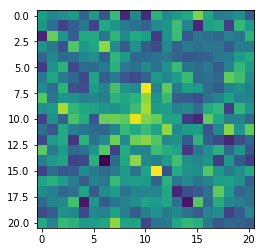

 imagem: 3 ----- tipo: 3 ----- class: 0 ----- prediction: 1 


In [15]:
%matplotlib inline

index_img=4



index_img-=1
plt.figure("imagem: {} , tipo: {} , class: {}".format(index_img, tipo, y_test[index_img]))
plt.imshow(x_test[0])#,cmap=plt.cm.binary)


plt.show()
print(" imagem: {} ----- tipo: {} ----- class: {} ----- prediction: {} ".format(index_img, tipo, y_test[index_img], np.argmax(predictions[index_img])))


In [16]:
print('list: ',history.history.keys())
print('loss: ',history.history['val_loss'])

list:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
loss:  [0.1542848726602892, 0.1456729727920145, 0.15901744000180673]


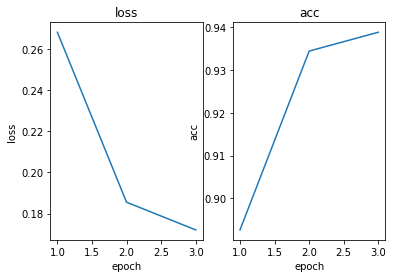

In [17]:
lista_hist=['loss', 'acc']
k=0
for parametro in lista_hist:
    

    x_axis = np.arange(1,len(history.history[parametro])+1,1)
    y_axis= history.history[parametro]
    plt.subplot(1, len(lista_hist), k+1)

    plt.plot(x_axis,y_axis)
    plt.xlabel('epoch')
    plt.ylabel(parametro)
    plt.title(parametro)
    k+=1
    
  
    
plt.show()

In [18]:
print('ESTATISTICAS DE LOS DATOS\n\n')


unos_train=0
ceros_train=0
unos_test=0
ceros_test=0

for val_train in y_train:

    if val_train==1:
        unos_train+=1
    else:
        ceros_train+=1


for val_test in y_test:

    if val_test==1:
        unos_test+=1
    else:
        ceros_test+=1    
        
print('unos_train: ', unos_train)
print('ceros_train: ', ceros_train)
print('percentage: %.2f' % (100*(unos_train/(unos_train+ceros_train))), '%')
print('\n\n\n')
print('unos_test: ', unos_test)
print('ceros_test: ', ceros_test)
print('percentage: %.2f' % (100*(unos_test/(unos_test+ceros_test))),'%')

ESTATISTICAS DE LOS DATOS


unos_train:  37509
ceros_train:  37491
percentage: 50.01 %




unos_test:  12491
ceros_test:  12509
percentage: 49.96 %


In [19]:
test_labels=y_test
rounded_predictions= model.predict_classes(r_x_test, batch_size=batch)


cm= confusion_matrix(test_labels, rounded_predictions)

cm_2= np.zeros((2,2), dtype=int)

cm_2[0,0]=cm[1,1]
cm_2[1,1]=cm[0,0]
cm_2[1,0]=cm[0,1]
cm_2[0,1]=cm[1,0]
print(cm_2)

cm=cm_2


[[11702   789]
 [  537 11972]]


In [20]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matix.
    Normalize can be applied by setting 'normalize=True'
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis-1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
        
        
    print(cm)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j], 
                 horizontalalignment = 'center', 
                 color = 'white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[11702   789]
 [  537 11972]]


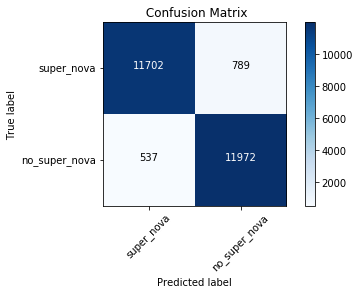

In [21]:
cm_plot_labels = ['super_nova','no_super_nova']
plot_confusion_matrix(cm,cm_plot_labels, title = ' Confusion Matrix')



In [22]:
print('       ESTADISTICAS      \n')
print('Valor máximo :', x_train.max())
print('Valor mínimo :', x_train.min())
print('Valor promedio :', x_train.mean())
print('Valor varianza :', x_train.var())
print('Valor desviación standar :', x_train.std())

       ESTADISTICAS      

Valor máximo : 1.0
Valor mínimo : 0.0
Valor promedio : 0.43186674
Valor varianza : 0.040720943
Valor desviación standar : 0.20179431


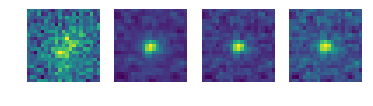

In [23]:
indeximage=4

for i in range(4):
    plt.subplot(1, 4, i+1)
    ximg=example_dict['images'][:,:,:,i]
    plt.imshow(ximg[indeximage])
    plt.axis('off')

plt.show()
